<h1>Purpose of this notebook</h1>
The purpose of this notebook is to see the effects of data augmentation.

Data augmentation is when the data is augmented to generate multiple versions of the same image.

When only a small dataset of images is available it might show to be beneficial to use data augmentation.
Since the neural network might be overfitting the training data.

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history

Using TensorFlow backend.


<b>Resources used to train, validate and test.</b>

In [2]:
train_path = '../Retraining/resources/train'
valid_path = '../Retraining/resources/valid'
test_path = '../Retraining/resources/test'

<h1>ImageDataGenerators: Without data augmentation</h1>


In [3]:
batch_size = 16

train_datagen_wo = ImageDataGenerator(
        rescale=1./255
)

valid_datagen_wo = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator_wo = train_datagen_wo.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator_wo = valid_datagen_wo.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 299 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


<h1>ImageDataGenerators: With data augmentation</h1>
<ul>
    <li> <b>Rescale</b> rescales image data from range [0 255] to range [0 1] </li>
    <li><b>Shear_range</b> a range with how much the data is augmented with respect to shear</li>
    <li><b>Zoom_range</b> range for a random zoom. [1-zoom_range 1+zoom_range]</li>
    <li><b>Horizontal_flip:</b> boolean if it should be possible to make a random horizontal flip</li>
</ul>


Should be tested:
<ul>
    <li><b>Rotation_range</b></li>
    <li><b>brightness_range</b></li>
</ul>

In [4]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 299 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


<h1>Network</h1>

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))    # 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))                               # 64
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999, epsilon=10e-8),
              metrics=['accuracy'])

#model.summary()

<h1>Testing performance with data augmentation</h1>

In [6]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=299 // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=82 // batch_size)

Epoch 1/50
18/18 [==============================] - 6s 325ms/step - loss: 1.1457 - acc: 0.5164 - val_loss: 0.4757 - val_acc: 0.7750
Epoch 2/50
18/18 [==============================] - 3s 151ms/step - loss: 0.5811 - acc: 0.7820 - val_loss: 0.4569 - val_acc: 0.8636
Epoch 3/50
18/18 [==============================] - 3s 155ms/step - loss: 0.5290 - acc: 0.7917 - val_loss: 0.3440 - val_acc: 0.9091
Epoch 4/50
18/18 [==============================] - 3s 147ms/step - loss: 0.4206 - acc: 0.7644 - val_loss: 0.2635 - val_acc: 0.9545
Epoch 5/50
18/18 [==============================] - 3s 148ms/step - loss: 0.3514 - acc: 0.8232 - val_loss: 0.2231 - val_acc: 0.9242
Epoch 6/50
18/18 [==============================] - 3s 144ms/step - loss: 0.3998 - acc: 0.7812 - val_loss: 0.2477 - val_acc: 0.9545
Epoch 7/50
18/18 [==============================] - 2s 139ms/step - loss: 0.3086 - acc: 0.8305 - val_loss: 0.2678 - val_acc: 0.9125
Epoch 8/50
18/18 [==============================] - 3s 175ms/step - loss: 0.

In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255
)

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 35 images belonging to 3 classes.


In [9]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 2ms/step


[0.5577661991119385, 0.8125]

In [ ]:
gul_path = '../Retraining/tfpoet/tf_files/test/gulerod.jpg'
img = image.load_img(gul_path, target_size=(224, 224))
img = image.img_to_array(img)
img = img
img = np.expand_dims(img, axis=0)
out = model.predict(img)

In [ ]:
labels

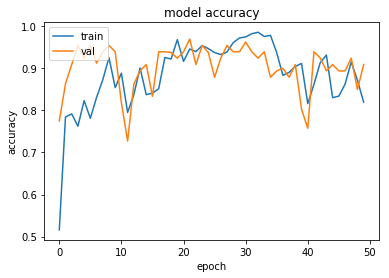

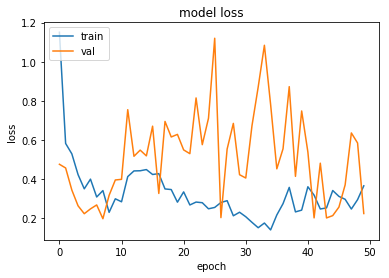

In [7]:
plot_history(history)

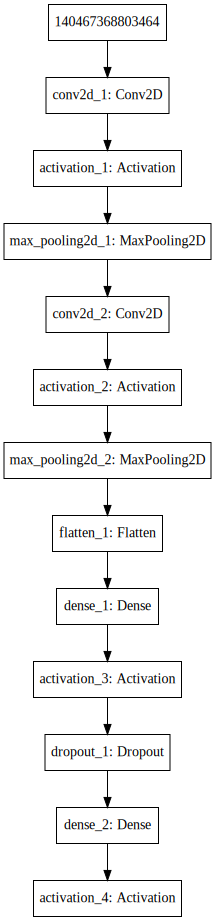

In [10]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

<h1>Testing performance without data augmentation</h1>

In [5]:
historyWO = model.fit_generator(
            train_generator_wo,
            steps_per_epoch=299 // batch_size,
            epochs=50,
            validation_data=validation_generator_wo,
            validation_steps=82 // batch_size)

Epoch 1/50
18/18 [==============================] - 3s 167ms/step - loss: 3.6822 - acc: 0.5288 - val_loss: 0.4258 - val_acc: 0.7875
Epoch 2/50
18/18 [==============================] - 1s 74ms/step - loss: 0.5941 - acc: 0.7125 - val_loss: 0.3255 - val_acc: 0.8182
Epoch 3/50
18/18 [==============================] - 1s 72ms/step - loss: 0.4434 - acc: 0.7924 - val_loss: 0.3207 - val_acc: 0.8333
Epoch 4/50
18/18 [==============================] - 1s 71ms/step - loss: 0.5501 - acc: 0.8083 - val_loss: 0.4336 - val_acc: 0.7879
Epoch 5/50
18/18 [==============================] - 1s 72ms/step - loss: 0.3391 - acc: 0.8576 - val_loss: 0.4569 - val_acc: 0.7727
Epoch 6/50
18/18 [==============================] - 1s 65ms/step - loss: 0.3407 - acc: 0.8469 - val_loss: 0.4954 - val_acc: 0.8788
Epoch 7/50
18/18 [==============================] - 1s 70ms/step - loss: 0.2713 - acc: 0.8992 - val_loss: 0.4874 - val_acc: 0.8250
Epoch 8/50
18/18 [==============================] - 1s 74ms/step - loss: 0.3354 - 

In [10]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 1ms/step


[2.0640554428100586, 0.8125]

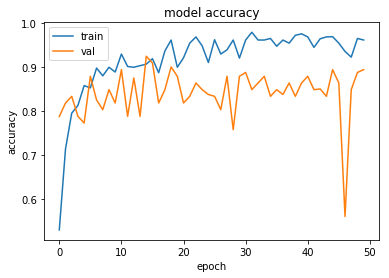

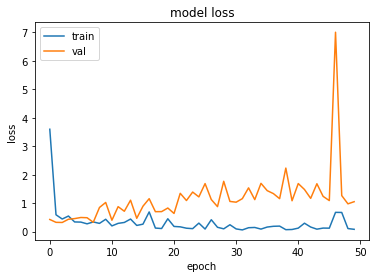

In [11]:
plot_history(historyWO)

<h1>Testing with original image size: 1280x720</h1>

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(720, 1280),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(720, 1280),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Test data generator
test_datagen = ImageDataGenerator(
        rescale=1./255
)

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(720, 1280),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


Network needs to be modified since the input images now is 1280x720.
The reason behind this is that the system being used runs out of memory if the above network is used directly.

In [4]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(720, 1280, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 718, 1278, 16)     448       
_________________________________________________________________
activation_1 (Activation)    (None, 718, 1278, 16)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 179, 319, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 177, 317, 32)      4640      
_________________________________________________________________
activation_2 (Activation)    (None, 177, 317, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 79, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 111232)            0         
__________

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/10
27/27 [==============================] - 69s 3s/step - loss: 2.8021 - acc: 0.4441 - val_loss: 0.8943 - val_acc: 0.6528
Epoch 2/10
27/27 [==============================] - 63s 2s/step - loss: 0.8864 - acc: 0.6025 - val_loss: 0.5743 - val_acc: 0.8433
Epoch 3/10
27/27 [==============================] - 61s 2s/step - loss: 0.6663 - acc: 0.7130 - val_loss: 0.5224 - val_acc: 0.7836
Epoch 4/10
27/27 [==============================] - 64s 2s/step - loss: 0.7382 - acc: 0.6806 - val_loss: 0.5199 - val_acc: 0.7164
Epoch 5/10
27/27 [==============================] - 63s 2s/step - loss: 1.2405 - acc: 0.7024 - val_loss: 0.6031 - val_acc: 0.7388
Epoch 6/10
27/27 [==============================] - 69s 3s/step - loss: 0.5366 - acc: 0.7662 - val_loss: 0.5784 - val_acc: 0.7388
Epoch 7/10
27/27 [==============================] - 68s 3s/step - loss: 0.5142 - acc: 0.7725 - val_loss: 0.4347 - val_acc: 0.8358
Epoch 8/10
27/27 [==============================] - 69s 3s/step - loss: 0.6206 - acc: 0.77

In [7]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

16/16 [==============================] - 0s 11ms/step


[0.1600848138332367, 0.9375]

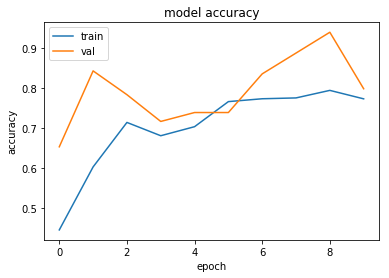

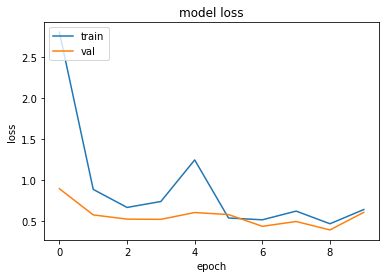

In [8]:
plot_history(history)

<h1>(D) Resizing image directly: 1280x720 -> 224x224</h1>

In [10]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history

In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))    # 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))                               # 64
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999, epsilon=10e-8),
              metrics=['accuracy'])

#model.summary()

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/100
13/13 [==============================] - 8s 634ms/step - loss: 2.6451 - acc: 0.3161 - val_loss: 1.0684 - val_acc: 0.4531
Epoch 2/100
13/13 [==============================] - 8s 620ms/step - loss: 1.0243 - acc: 0.4806 - val_loss: 0.8960 - val_acc: 0.6186
Epoch 3/100
13/13 [==============================] - 7s 527ms/step - loss: 0.8630 - acc: 0.6072 - val_loss: 0.7946 - val_acc: 0.5763
Epoch 4/100
13/13 [==============================] - 7s 523ms/step - loss: 0.7507 - acc: 0.6106 - val_loss: 0.5642 - val_acc: 0.6780
Epoch 5/100
13/13 [==============================] - 7s 506ms/step - loss: 0.6120 - acc: 0.6927 - val_loss: 0.5151 - val_acc: 0.7203
Epoch 6/100
13/13 [==============================] - 7s 544ms/step - loss: 0.5507 - acc: 0.7513 - val_loss: 0.5357 - val_acc: 0.6875
Epoch 7/100
13/13 [==============================] - 8s 585ms/step - loss: 0.4799 - acc: 0.7875 - val_loss: 0.4412 - val_acc: 0.7542
Epoch 8/100
13/13 [==============================] - 7s 539ms/step - 

13/13 [==============================] - 9s 689ms/step - loss: 0.2025 - acc: 0.9322 - val_loss: 0.0516 - val_acc: 0.9746
Epoch 63/100
13/13 [==============================] - 7s 570ms/step - loss: 0.1446 - acc: 0.9663 - val_loss: 0.0755 - val_acc: 0.9661
Epoch 64/100
13/13 [==============================] - 7s 566ms/step - loss: 0.1436 - acc: 0.9537 - val_loss: 0.0605 - val_acc: 0.9746
Epoch 65/100
13/13 [==============================] - 7s 559ms/step - loss: 0.1395 - acc: 0.9591 - val_loss: 0.0475 - val_acc: 0.9831
Epoch 66/100
13/13 [==============================] - 8s 635ms/step - loss: 0.1202 - acc: 0.9660 - val_loss: 0.0452 - val_acc: 0.9844
Epoch 67/100
13/13 [==============================] - 8s 651ms/step - loss: 0.1116 - acc: 0.9734 - val_loss: 0.1248 - val_acc: 0.9746
Epoch 68/100
13/13 [==============================] - 8s 602ms/step - loss: 0.0968 - acc: 0.9590 - val_loss: 0.0260 - val_acc: 0.9831
Epoch 69/100
13/13 [==============================] - 8s 581ms/step - loss:

In [7]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[0.05369170010089874, 0.96875]

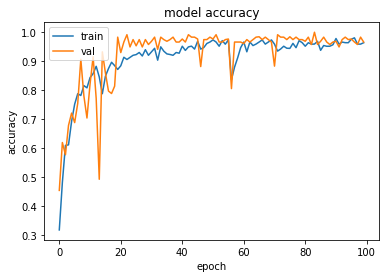

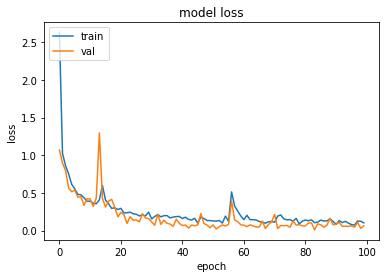

In [8]:
plot_history(history, save=True, path='plots/', name='full-224-batch64-3')

In [14]:
plot_history(history, mean_N=5)

TypeError: plot_history() got an unexpected keyword argument 'mean_N'

<h1>(D): Without data augmentation & regularization</h1>

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history

Using TensorFlow backend.


In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255
)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))    # 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))                               # 64
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/100
13/13 [==============================] - 5s 359ms/step - loss: 1.3756 - acc: 0.3410 - val_loss: 1.0796 - val_acc: 0.4844
Epoch 2/100
13/13 [==============================] - 5s 362ms/step - loss: 1.0935 - acc: 0.3625 - val_loss: 1.0265 - val_acc: 0.4492
Epoch 3/100
13/13 [==============================] - 4s 344ms/step - loss: 0.9674 - acc: 0.3989 - val_loss: 0.7677 - val_acc: 0.4576
Epoch 4/100
13/13 [==============================] - 4s 317ms/step - loss: 0.8098 - acc: 0.6145 - val_loss: 0.6131 - val_acc: 0.7203
Epoch 5/100
13/13 [==============================] - 4s 301ms/step - loss: 0.7499 - acc: 0.6407 - val_loss: 0.6192 - val_acc: 0.7119
Epoch 6/100
13/13 [==============================] - 5s 362ms/step - loss: 0.7207 - acc: 0.7387 - val_loss: 0.6566 - val_acc: 0.6953
Epoch 7/100
13/13 [==============================] - 5s 389ms/step - loss: 0.6967 - acc: 0.7644 - val_loss: 0.6077 - val_acc: 0.8220
Epoch 8/100
13/13 [==============================] - 4s 327ms/step - 

In [6]:
imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[1.6857104301452637, 0.84375]

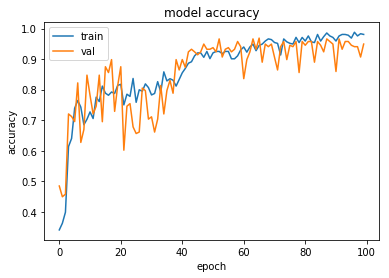

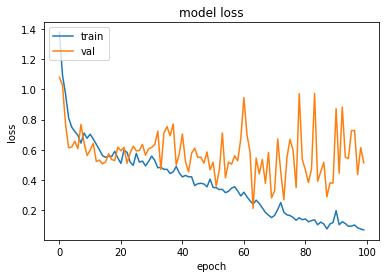

In [7]:
plot_history(history)